# Autoencoders

Un autoencoder es un tipo de red neuronal artificial que se entrena para aprender una representación eficiente y compacta de los datos de entrada. Su estructura básica consta de dos partes: el codificador y el decodificador. Estos componentes trabajan juntos para comprimir la información de entrada en una representación interna de menor dimensionalidad y, a continuación, descomprimir la representación para generar una salida que sea una reconstrucción lo más fiel posible de los datos de entrada.

![Diagrama de un Autoencoder](https://upload.wikimedia.org/wikipedia/commons/2/28/Autoencoder_structure.png)

En la imagen de arriba, se puede ver un diagrama básico de la arquitectura de un autoencoder. La capa de entrada recibe los datos originales, y el codificador, compuesto por múltiples capas ocultas, reduce la dimensionalidad de los datos. La capa de salida del codificador, también llamada capa de código, representa la representación interna de los datos. Luego, el decodificador, que es una réplica inversa del codificador, toma esta representación interna y la expande nuevamente a la misma dimensión que los datos originales.

## Funcionamiento

La forma en que un autoencoder aprende a realizar la compresión y descompresión de datos es mediante el proceso de entrenamiento supervisado. El objetivo principal es minimizar la diferencia entre los datos de entrada y la salida generada por el decodificador. Esto se logra ajustando los pesos y sesgos de las capas del codificador y el decodificador.


### Codificación de Datos:

1. Los datos de entrada, que pueden ser imágenes, texto u otros tipos de información, se pasan a través del codificador.
2. El codificador consiste en capas neuronales que aplican transformaciones lineales y funciones de activación no lineales para mapear los datos de alta dimensionalidad a una representación de menor dimensionalidad llamada representación latente.

### Decodificación de la Representación Latente:

3. La representación de menor dimensionalidad en la capa de codificación se pasa al decodificador.
4. El decodificador, aplica transformaciones para expandir la representación latente de vuelta a la dimensión original.

### Función de Pérdida y Entrenamiento

Durante el proceso de entrenamiento, se utiliza una función de pérdida que mide la discrepancia entre los datos de entrada y la salida generada por el decodificador. Comúnmente, se usa el error cuadrático medio (MSE) como función de pérdida.

El objetivo del entrenamiento es ajustar los pesos y sesgos de las capas del codificador y el decodificador para minimizar la función de pérdida. Esto significa que la representación latente capturará la estructura esencial de los datos, y la reconstrucción será lo más precisa posible.



## Aplicaciones

### Reducción de Dimensionalidad

Los autoencoders son eficaces para representar datos complejos en un espacio de menor dimensión. Esto es útil para la visualización de datos y la compresión de información.

Esto se puede lograr tomando la solo la parte de codificación y tomar la representación latente como un representación mas compacta de los datos originales.

### Eliminación de ruido

En el proceso de entrenamiento, se alimenta al autoencoder con datos de entrada que contienen ruido.
El autoencoder se entrena para aprender a reconstruir los datos limpios, eliminando el ruido presente en los datos de entrada.
La función de pérdida se utiliza para minimizar la discrepancia entre los datos de entrada ruidosos y la reconstrucción libre de ruido.



### Detección de Anomalías

Durante el proceso de entrenamiento, el autoencoder aprende a codificar los patrones y estructuras normales. a partir de la representación latente, el autoencoder puede reconstruir datos que son similares a los ejemplos normales con los que se entrenó.

Cuando se tiene un nuevo conjunto de datos, se compara la diferencia entre los datos de entrada y su reconstrucción. Si los datos de entrada son "normales" o típicos, la diferencia entre los datos originales y su reconstrucción será pequeña, y las anomalías generalmente resultarán en diferencias significativas entre los datos de entrada y su reconstrucción.





In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential
from keras.utils import plot_model

2023-11-11 10:48:09.217588: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-11 10:48:09.628823: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-11 10:48:09.628853: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-11 10:48:09.631391: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-11 10:48:09.869572: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-11 10:48:09.871794: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [16]:
autoencoder = Sequential()

autoencoder.add(Dense(128, activation='relu', input_shape=(784,)))
autoencoder.add(Dense(64, activation='relu'))
autoencoder.add(Dense(32, activation='relu'))
autoencoder.add(Dense(16, activation='relu'))

autoencoder.add(Dense(32, activation='relu'))
autoencoder.add(Dense(64, activation='relu'))
autoencoder.add(Dense(128, activation='relu'))
autoencoder.add(Dense(784, activation='sigmoid'))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [17]:
autoencoder.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 128)               100480    
                                                                 
 dense_24 (Dense)            (None, 64)                8256      
                                                                 
 dense_25 (Dense)            (None, 32)                2080      
                                                                 
 dense_26 (Dense)            (None, 16)                528       
                                                                 
 dense_27 (Dense)            (None, 32)                544       
                                                                 
 dense_28 (Dense)            (None, 64)                2112      
                                                                 
 dense_29 (Dense)            (None, 128)              

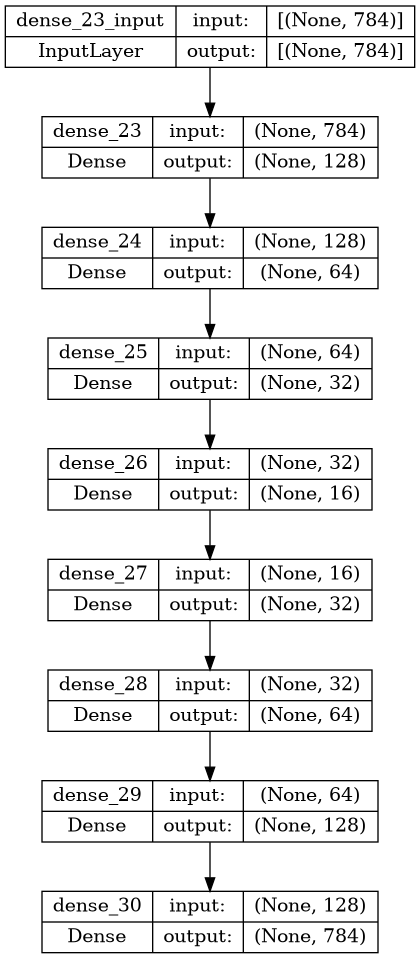

In [18]:
plot_model(autoencoder, show_shapes=True)


In [19]:
history = autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True)

Epoch 1/50
235/235 [==============================] - 4s 12ms/step - loss: 0.2665
Epoch 2/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1752
Epoch 3/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1490
Epoch 4/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1389
Epoch 5/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1337
Epoch 6/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1294
Epoch 7/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1262
Epoch 8/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1236
Epoch 9/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1213
Epoch 10/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1192
Epoch 11/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1177
Epoch 12/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1165
Epoch 13/50
2

In [20]:
autoencoder.layers[3].output   # la 4ta (empieza en cero) es la capa más pequeña

codificador = Model(inputs=autoencoder.input, outputs=autoencoder.layers[3].output)  # copia toda la estructura interna


313/313 [==============================] - 1s 2ms/step


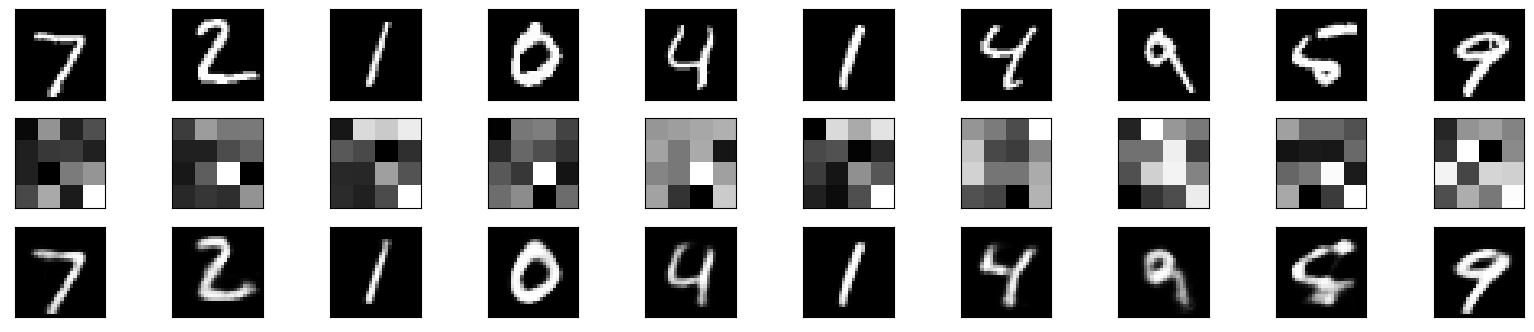

In [21]:
decoded_imgs = autoencoder.predict(x_test)
codificados = codificador(x_test)

n = 10  # número de imágenes para mostrar
plt.figure(figsize=(20, 4))
for i in range(n):
    # Imagen original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Imagen codificada
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(np.array(codificados[i]).reshape((4,4)))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Imagen reconstruida por el autoencoder
    ax = plt.subplot(3, n, i + 1 + n+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


**Ejercicio/Tarea:**

Encuentra los datos anómalos con el modelo que acabamos de entrenar.